In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from mcu_original import MCUOriginalModel
import cylinder_dataset_generator as cyl_generator
import dataset_generator
from mcu_experiments import MCUexperiments
from mcu_plots import MCUplots

In [3]:
figure_num = 10**3
figure_point_cnt = 1000
deterministic_param_scatter = False
p = 2
lw = np.array([0, -75])
up = np.array([20, 75])
fixed_params = {"height": 100}
noise_level = 0
param_names = np.array(["radius", "rotation_angle_x"])
control_vars = dataset_generator.get_control_vars(deterministic=deterministic_param_scatter, dimensionality=p,
                                                  size=figure_num,
                                                  lw=lw, up=up)
control_vars_dict = dataset_generator.put_control_vars_in_dict(control_vars, p, param_names)
figures = dataset_generator.generate_array_of_figures(control_vars_dict, cyl_generator.generate_cylinder_points,
                                                      noise_level=noise_level, min_num_points=figure_point_cnt, fixed_params=fixed_params)
mcu_model = MCUOriginalModel(k=5, c=10000, figures=figures, params=control_vars, params_names=param_names)

In [4]:
mcu_model.train()
print(f"rre_median_embedding_vs_params: {mcu_model.compute_rre_median_embedding_vs_params()}")

/Users/Ekaterina.Inkina/Library/Python/3.9/lib/python/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


rre_median_embedding_vs_params: 0.03716816381733854


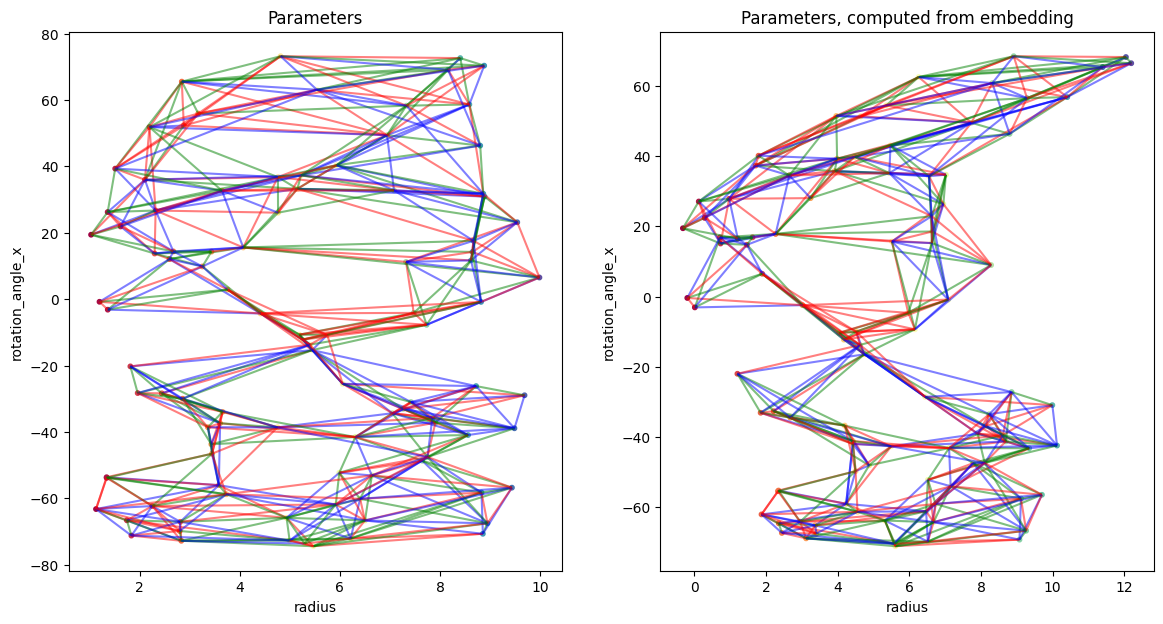

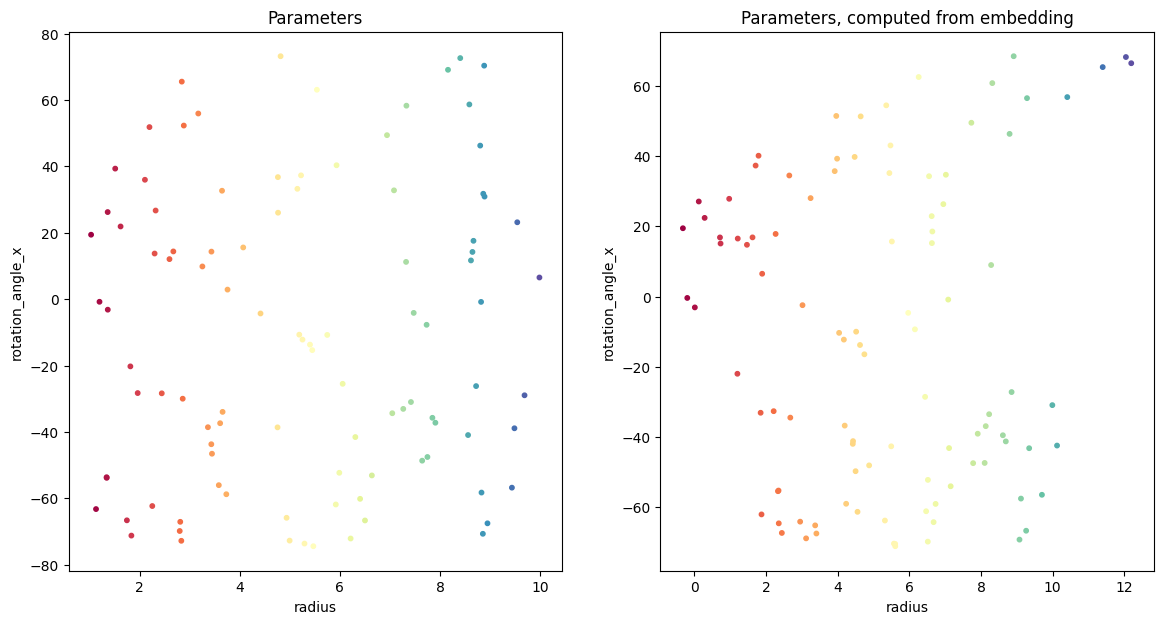

In [150]:
mcu_plots = MCUplots(mcu_model)
mcu_plots.plot_embeddings_vs_parameters(with_edges=False, annotate=False)
mcu_plots.plot_embeddings_vs_parameters(with_edges=True, annotate=False)

In [151]:
mcu_experiments = MCUexperiments(mcu_model)
interval_runs, intervals = mcu_experiments.test_predictive_optimization(lw, up, cyl_generator.generate_cylinder_points, figure_point_cnt, noise_level, pieces_cnt=10, test_data_size=20, same_value=False)

Finding neighbors: 0 ms , optimization: 1 ms
-----------
x_opt  = [  1.61562774 -58.7968868 ], x_err = 38.837101516692655
x_real = [  1.13028845 -63.35010016]
Finding neighbors: 0 ms , optimization: 2 ms
-----------
x_opt  = [  2.48943847 -78.2669841 ], x_err = 30.44239762932221
x_real = [  1.34219351 -74.92681542]
Finding neighbors: 0 ms , optimization: 1 ms
-----------
x_opt  = [  2.1253468  -57.68570569], x_err = 41.052913496275366
x_real = [  1.59146565 -62.84474755]
Finding neighbors: 0 ms , optimization: 1 ms
-----------
x_opt  = [  2.41296803 -58.820252  ], x_err = 52.175369272817605
x_real = [  1.43183867 -67.85725453]
Finding neighbors: 0 ms , optimization: 1 ms
-----------
x_opt  = [  2.00687493 -58.94439708], x_err = 10.046816108652248
x_real = [  1.28374811 -65.50477162]
Finding neighbors: 0 ms , optimization: 1 ms
-----------
x_opt  = [  1.78531975 -58.92913019], x_err = 19.191505376683306
x_real = [  1.24092574 -64.11453596]
Finding neighbors: 0 ms , optimization: 1 ms
--

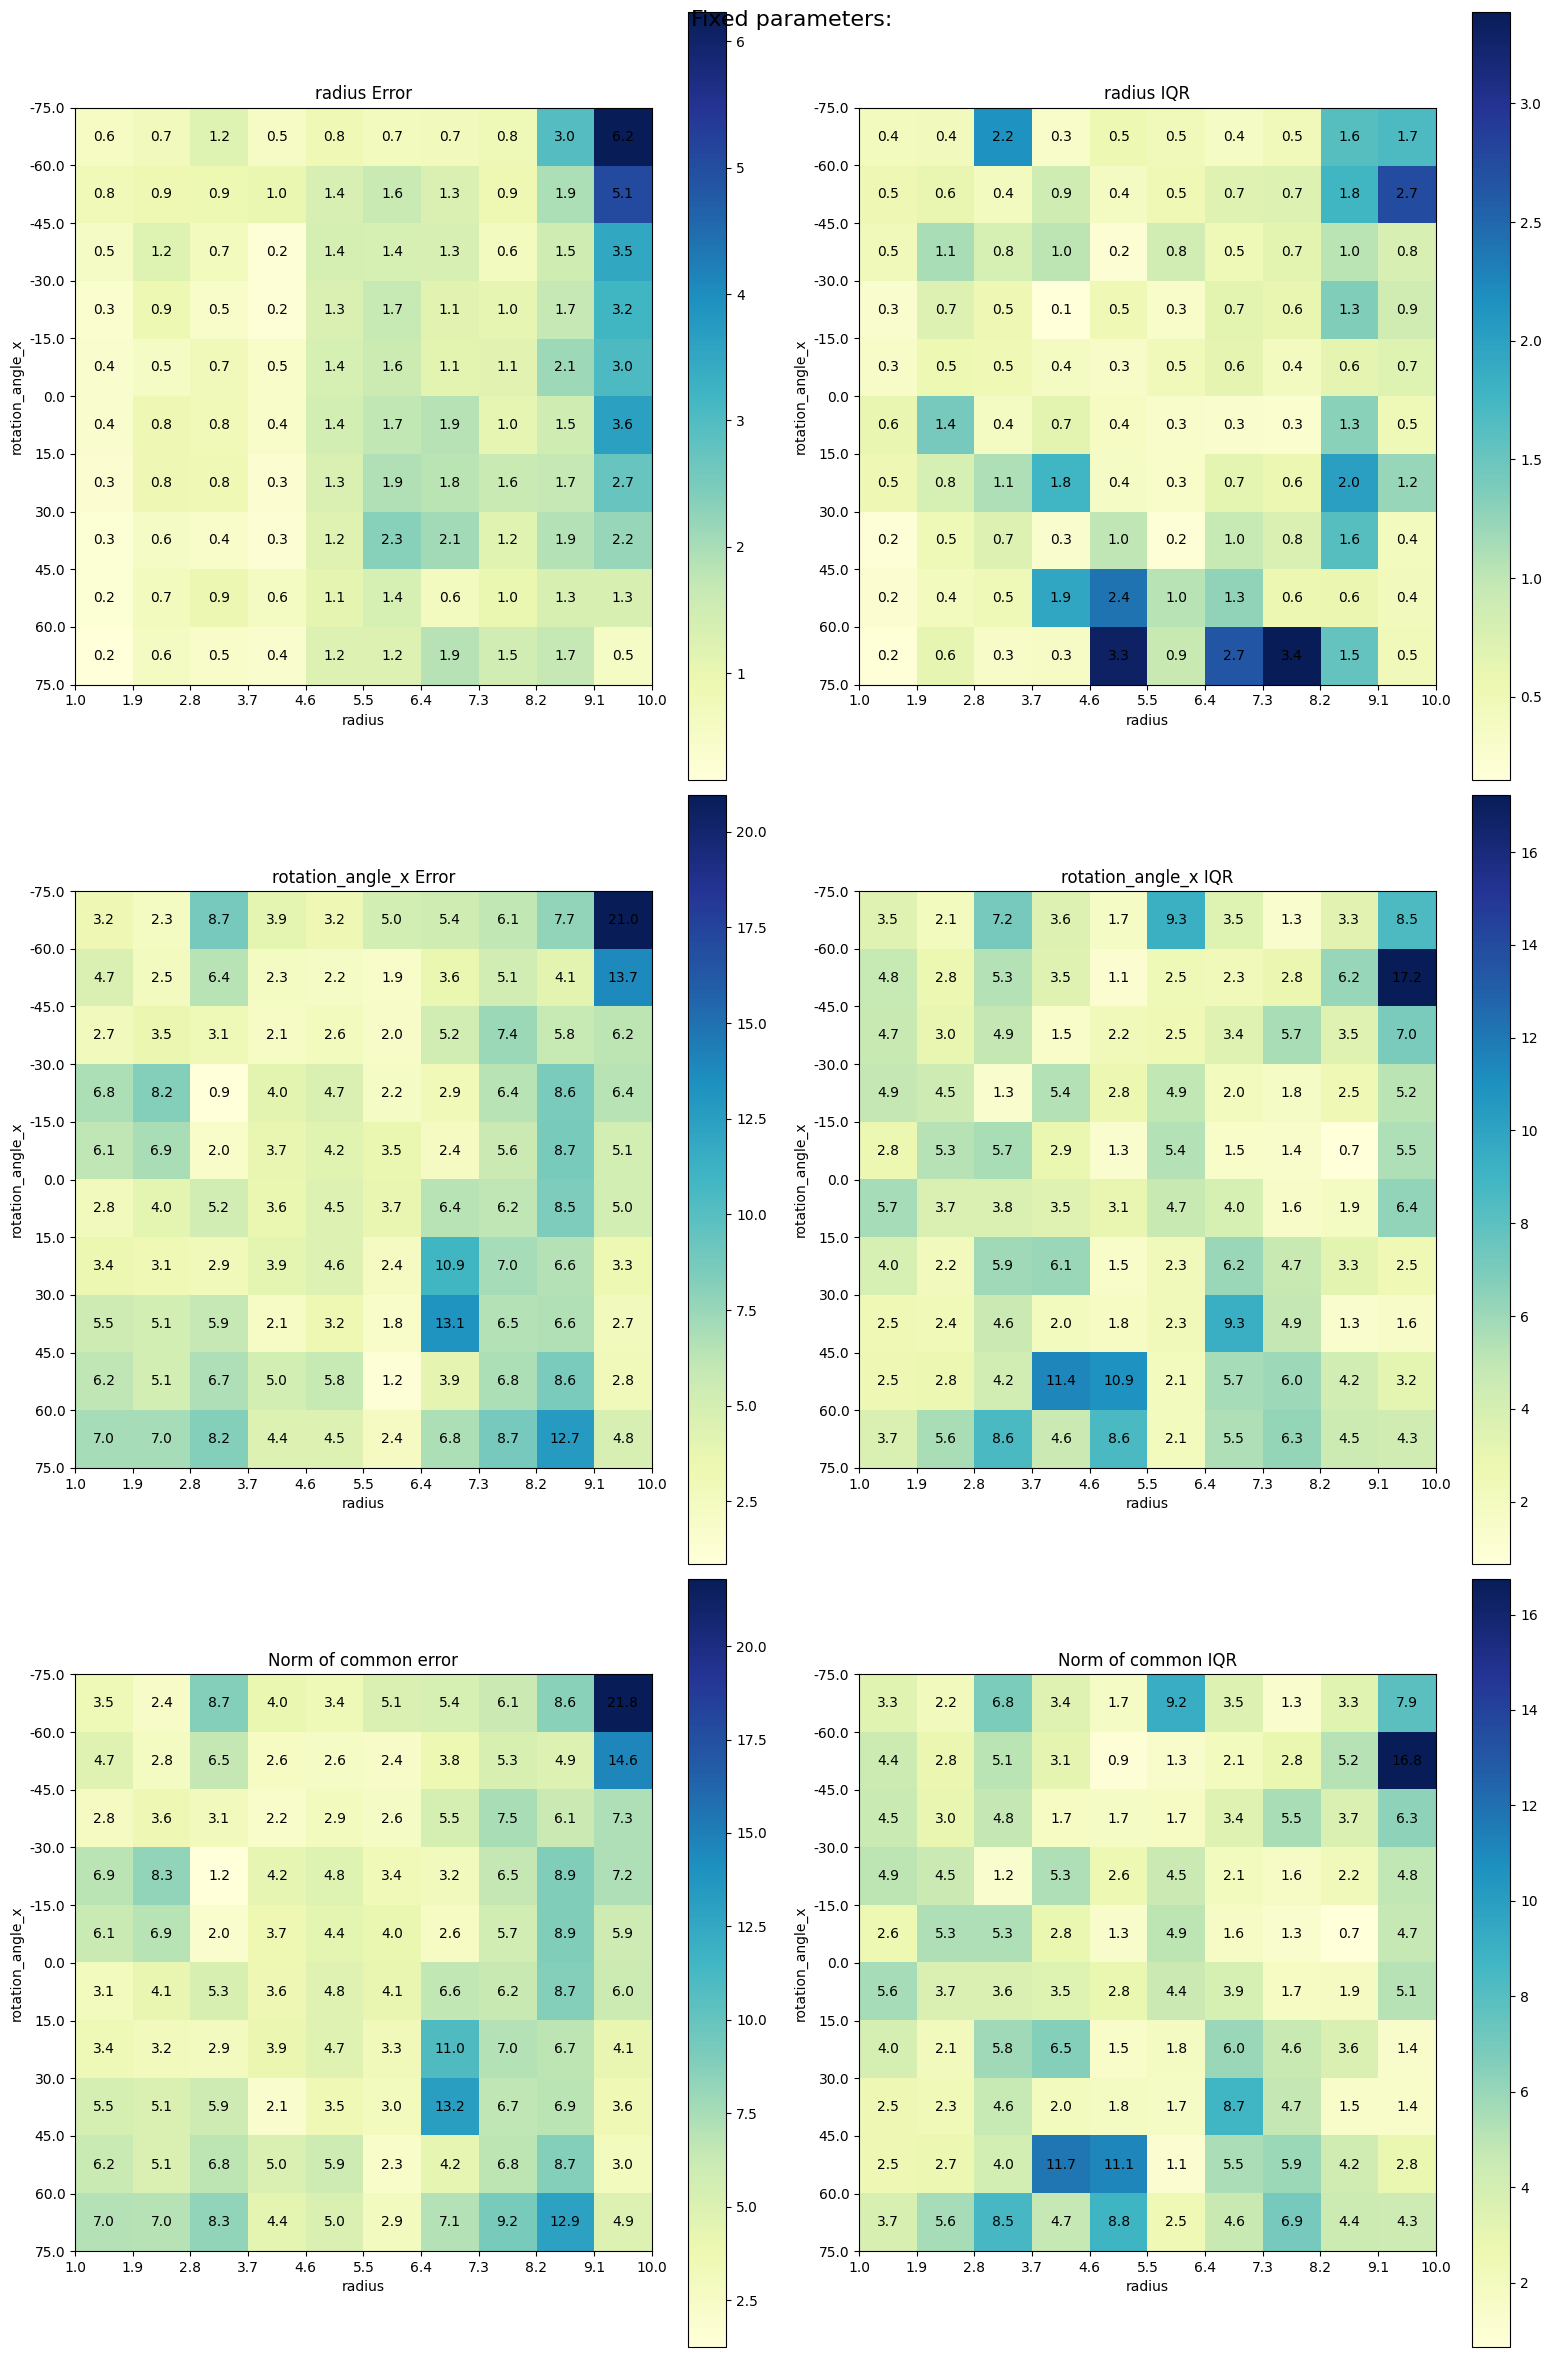

In [153]:
mcu_plots.plot_2d_predictive_optimization_heatmaps(intervals, interval_runs, fixed_params_map={})

0.7392065416625648 10.035086700063117 -0.7856334769458222 45.59313514852548


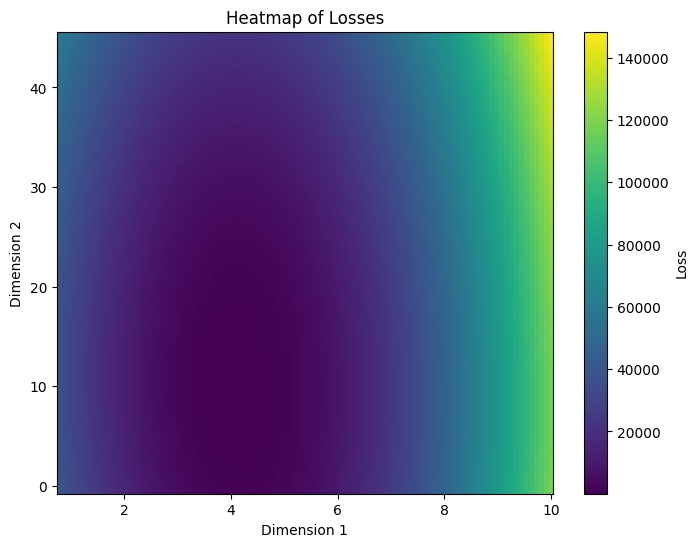

Finding neighbors: 1 ms , optimization: 174 ms
x_opt = [ 2.9669667  15.05992615], x_err = 0.0016747617510351393
x_real = [ 3 15]
0.7392065416625648 10.035086700063117 -0.7856334769458222 45.59313514852548


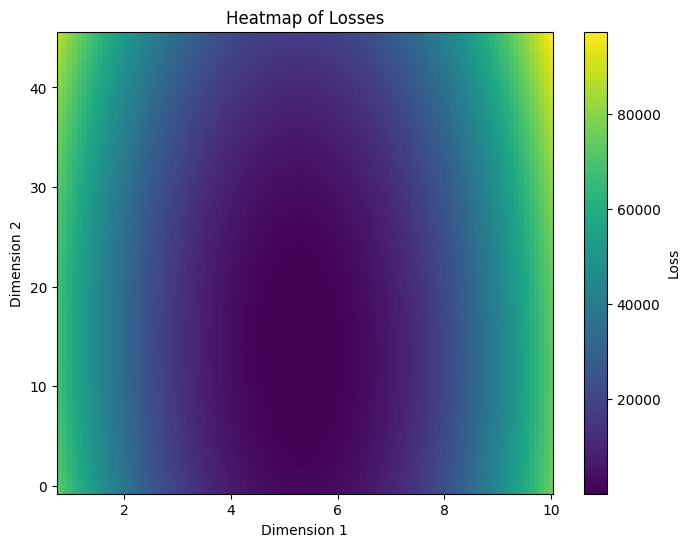

Finding neighbors: 1 ms , optimization: 165 ms
x_opt = [ 3.97055555 20.93389037], x_err = 0.12318884038920398
x_real = [ 4 21]
0.7392065416625648 10.035086700063117 -0.7856334769458222 45.59313514852548


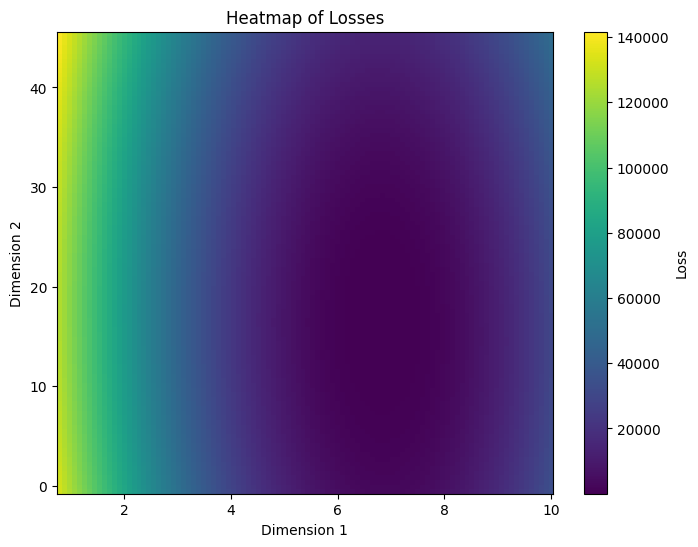

Finding neighbors: 1 ms , optimization: 171 ms
x_opt = [ 5.0304985  29.65335566], x_err = 0.002942246498999094
x_real = [ 5 30]
0.7392065416625648 10.035086700063117 -0.7856334769458222 45.59313514852548


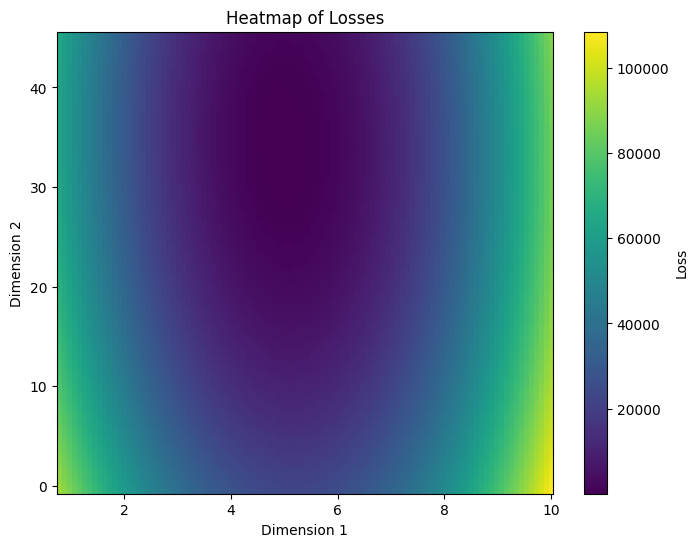

Finding neighbors: 2 ms , optimization: 178 ms
x_opt = [ 7.95552904 19.95612064], x_err = 0.0012933797328596426
x_real = [ 8 20]


In [100]:
test_control_vars = np.array([[3, 15], [4, 21], [5, 30], [8, 20]])
test_control_vars_dict = dataset_generator.put_control_vars_in_dict(test_control_vars, p,
                                                                    mcu_model.params_names)
test_figures = dataset_generator.generate_array_of_figures(test_control_vars_dict, cyl_generator.generate_cylinder_points,
                                                           noise_level=noise_level,
                                                           min_num_points=figure_point_cnt)
x_opts = []
for (figure, control_var) in zip(test_figures, test_control_vars):
    x_opt, x_err = mcu_model.predict(figure, gd = False, plot_loss=True)
    print(f"x_opt = {x_opt}, x_err = {x_err}" )
    print(f"x_real = {control_var}")